In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot
import statsmodels.api as sm
import seaborn as sns

ipath = 'D:\Usuario\Downloads\original.xlsx'
data = pd.read_excel(ipath)
data.head()


,Periodo,Tipo Producto,Region,Ingresos,Gastos
0,Q1 2017,Accesorios,AGO - África/Angola,66319.703782,56708.152509
1,Q1 2017,Aplicaciones,AGO - África/Angola,122357.282946,77039.770744
2,Q1 2017,Celulares,AGO - África/Angola,265278.815126,215226.208498
3,Q1 2017,Musica,AGO - África/Angola,130447.020661,86964.680441
4,Q1 2017,PC,AGO - África/Angola,394602.237500,326567.368966


In [4]:
data.drop(columns=['Periodo'], inplace=True)

In [5]:
nullColumns = []    #Lista que contendrá las columnas con valores Nulos
for column in data.columns:
    if data[column].isnull().sum() > 0:
        print(column, data[column].isnull().sum())
        nullColumns.append(column)

In [6]:
data['Tipo Producto'].value_counts()

Tablets         672
TV              672
Celulares       672
Musica          672
PC              672
Aplicaciones    672
Accesorios      672
Name: Tipo Producto, dtype: int64

In [7]:
data['Region'].value_counts()

SWE - Europa/Suecia                   84
EGY - África/Egipto                   84
CZE - Europa/República Checa          84
ISR - Asia/Israel                     84
ZAF - África/Sudáfrica                84
THA - Asia/Tailandia                  84
TUR - Asia/Turquía                    84
NGA - África/Nigeria                  84
VEN - América/Venezuela               84
IDN - Asia/Indonesia                  84
GBR - Europa/Reino Unido              84
AUS - Oceanía/Australia               84
PER - América/Perú                    84
CAN - América/Canadá                  84
DOM - América/República Dominicana    84
RUS - Asia/Rusia                      84
PRT - Europa/Portugal                 84
MEX - América/México                  84
IRL - Europa/Irlanda                  84
NOR - Europa/Noruega                  84
FIN - Europa/Finlandia                84
DEU - Europa/Alemania                 84
KOR - Asia/República de Corea         84
GTM - América/Guatemala               84
SVK - Europa/Esl

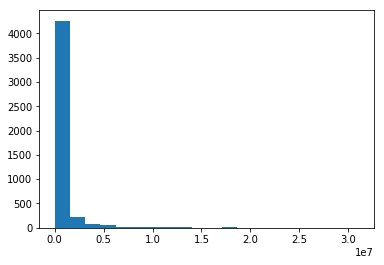

In [8]:
plt.hist(data['Ingresos'], bins = 20)
plt.show()

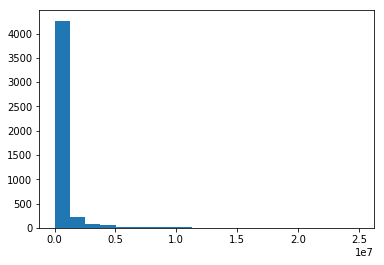

In [9]:
plt.hist(data['Gastos'], bins = 20)
plt.show()

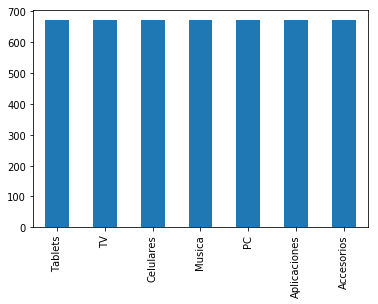

In [10]:
data['Tipo Producto'].value_counts().plot.bar()

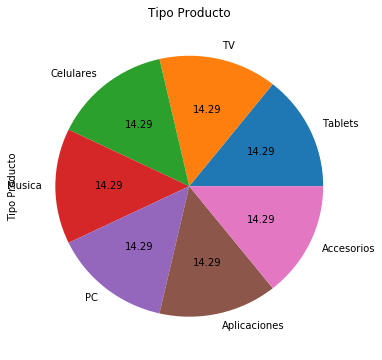

In [11]:
plot = data['Tipo Producto'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Tipo Producto')

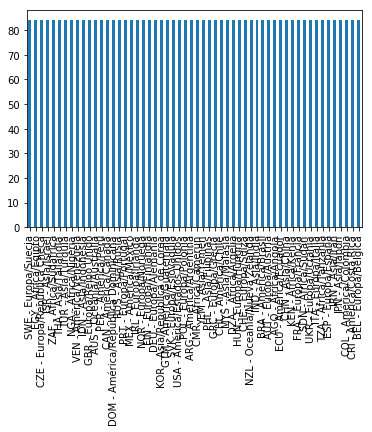

In [12]:
data['Region'].value_counts().plot.bar()

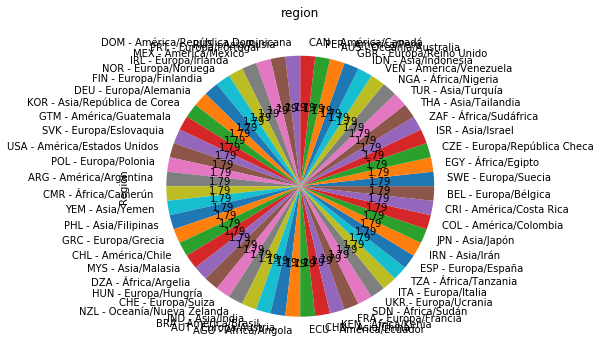

In [13]:
plot = data['Region'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='region')

In [14]:
pd.pivot_table(data, index=['Tipo Producto'],
                        columns=['Region'],
                        values=['Ingresos', 'Gastos'],
                        aggfunc={'Ingresos': 'mean', 'Gastos':'mean'},
                )

Gastos                          \
Region        AGO - África/Angola ARG - América/Argentina   
Tipo Producto                                               
Accesorios           54076.878159            79691.357873   
Aplicaciones         64156.242210            91533.742425   
Celulares           218040.129141           371620.998597   
Musica               80775.448351           113353.724501   
PC                  368695.995178           528561.277391   
TV                   28363.394792            41313.365034   
Tablets              74721.844975           114368.349983   

                                                            \
Region        AUS - Oceanía/Australia AUT - Europa/Austria   
Tipo Producto                                                
Accesorios               43857.666739         18024.997169   
Aplicaciones             52784.634170         23398.907840   
Celulares               188255.927163         78882.961140   
Musica                   66350.329064         27254.541369   
PC                      311200.923769        117287.531643   
TV                       22872.856713          9081.577658   
Tablets                  64761.905020         26314.732147   

                                                                              \
Region        BEL - Europa/Bélgica BRA - América/Brasil CAN - América/Canadá   
Tipo Producto                                                                  
Accesorios            30444.365162         3.550213e+05         9.318245e+05   
Aplicaciones          36694.570735         4.160726e+05         1.120865e+06   
Celulares            130578.070757         1.550148e+06         4.261244e+06   
Musica                43944.448331         5.250309e+05         1.300143e+06   
PC                   233444.633919         2.635224e+06         6.124728e+06   
TV                    15520.457172         1.812912e+05         4.549470e+05   
Tablets               41880.372760         5.115745e+05         1.297980e+06   

                                                                       ...  \
Region        CHE - Europa/Suiza CHL - América/Chile CHN - Asia/China  ...   
Tipo Producto                                                          ...   
Accesorios          15213.009981        40935.516474     2.200437e+06  ...   
Aplicaciones        18324.218032        49012.404219     2.575524e+06  ...   
Celulares           66260.028321       174248.986091     8.580172e+06  ...   
Musica              21317.149609        57442.231921     3.101940e+06  ...   
PC                  90648.647718       285495.931234     1.538373e+07  ...   
TV                   7769.583608        20252.824893     1.078551e+06  ...   
Tablets             21191.569607        59907.083102     3.182672e+06  ...   

                             Ingresos                      \
Region        SVK - Europa/Eslovaquia SWE - Europa/Suecia   
Tipo Producto                                               
Accesorios               17051.181606        20901.330677   
Aplicaciones             28555.190913        34586.896023   
Celulares                69486.508981        88733.353235   
Musica                   33130.070751        44691.228484   
PC                      108502.334986       140496.363621   
TV                       11764.472356        15157.737629   
Tablets                  23849.774591        29818.330694   

                                                                             \
Region        THA - Asia/Tailandia TUR - Asia/Turquía TZA - África/Tanzania   
Tipo Producto                                                                 
Accesorios            1.627206e+05       1.666452e+05         122488.109444   
Aplicaciones          2.564727e+05       2.831250e+05         191756.158151   
Celulares             7.188912e+05       6.851823e+05         469839.199432   
Musica                3.223815e+05       3.451301e+05         235158.434037   
PC                    1.133063e+06       1.035705

In [15]:
data['ingresos target'] = data['Ingresos'] > 122357.282946
data['ingreso_target1'] = (data['ingresos target']==1).astype(int)

In [16]:
data.drop(columns = ['ingresos target','Ingresos'], inplace=True)

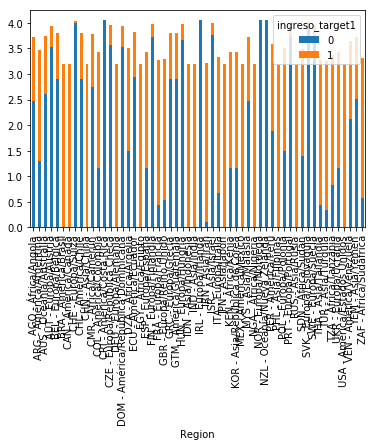

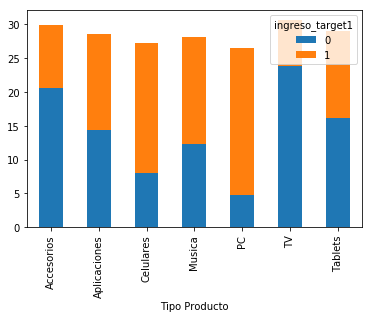

In [17]:
plot = pd.crosstab(index=data['Region'],
            columns=data['ingreso_target1']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
plot = pd.crosstab(index=data['Tipo Producto'],
            columns=data['ingreso_target1']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

In [18]:
data1 = pd.get_dummies(data['Tipo Producto'], prefix='cat_prod') 
data= pd.concat([data, data1], axis=1)                         
del data1 

In [98]:
data1 = pd.get_dummies(data['Region'], prefix='cat_prod') 
data= pd.concat([data, data1], axis=1)                         
del data1 

In [99]:
data.drop(columns=['Region','Tipo Producto'], inplace=True)

In [100]:
data.head()

,Gastos,ingreso_target1,cat_prod_Accesorios,cat_prod_Aplicaciones,cat_prod_Celulares,cat_prod_Musica,cat_prod_PC,cat_prod_TV,cat_prod_Tablets,cat_prod_AGO - África/Angola,...,cat_prod_SVK - Europa/Eslovaquia,cat_prod_SWE - Europa/Suecia,cat_prod_THA - Asia/Tailandia,cat_prod_TUR - Asia/Turquía,cat_prod_TZA - África/Tanzania,cat_prod_UKR - Europa/Ucrania,cat_prod_USA - América/Estados Unidos,cat_prod_VEN - América/Venezuela,cat_prod_YEM - Asia/Yemen,cat_prod_ZAF - África/Sudáfrica
0,56708.152509,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,77039.770744,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,215226.208498,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,86964.680441,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,326567.368966,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
data.columns

Index([                                     u'Gastos',
                                   u'ingreso_target1',
                               u'cat_prod_Accesorios',
                             u'cat_prod_Aplicaciones',
                                u'cat_prod_Celulares',
                                   u'cat_prod_Musica',
                                       u'cat_prod_PC',
                                       u'cat_prod_TV',
                                  u'cat_prod_Tablets',
                      u'cat_prod_AGO - África/Angola',
                  u'cat_prod_ARG - América/Argentina',
                  u'cat_prod_AUS - Oceanía/Australia',
                     u'cat_prod_AUT - Europa/Austria',
                     u'cat_prod_BEL - Europa/Bélgica',
                     u'cat_prod_BRA - América/Brasil',
                     u'cat_prod_CAN - América/Canadá',
                       u'cat_prod_CHE - Europa/Suiza',
                      u'cat_prod_CHL - América/Chile',
          

In [102]:
relaciones = data[[u'Gastos',
                                   u'ingreso_target1',
                               u'cat_prod_Accesorios',
                             u'cat_prod_Aplicaciones',
                                u'cat_prod_Celulares',
                                   u'cat_prod_Musica',
                                       u'cat_prod_PC',
                                       u'cat_prod_TV',
                                  u'cat_prod_Tablets',
                      u'cat_prod_AGO - África/Angola',
                  u'cat_prod_ARG - América/Argentina',
                  u'cat_prod_AUS - Oceanía/Australia',
                     u'cat_prod_AUT - Europa/Austria',
                     u'cat_prod_BEL - Europa/Bélgica',
                     u'cat_prod_BRA - América/Brasil',
                     u'cat_prod_CAN - América/Canadá',
                       u'cat_prod_CHE - Europa/Suiza',
                      u'cat_prod_CHL - América/Chile',
                         u'cat_prod_CHN - Asia/China',
                     u'cat_prod_CMR - África/Camerún',
                   u'cat_prod_COL - América/Colombia',
                 u'cat_prod_CRI - América/Costa Rica',
             u'cat_prod_CZE - Europa/República Checa',
                    u'cat_prod_DEU - Europa/Alemania',
       u'cat_prod_DOM - América/República Dominicana',
                     u'cat_prod_DZA - África/Argelia',
                    u'cat_prod_ECU - América/Ecuador',
                      u'cat_prod_EGY - África/Egipto',
                      u'cat_prod_ESP - Europa/España',
                   u'cat_prod_FIN - Europa/Finlandia',
                     u'cat_prod_FRA - Europa/Francia',
                 u'cat_prod_GBR - Europa/Reino Unido',
                      u'cat_prod_GRC - Europa/Grecia',
                  u'cat_prod_GTM - América/Guatemala',
                     u'cat_prod_HUN - Europa/Hungría',
                     u'cat_prod_IDN - Asia/Indonesia',
                         u'cat_prod_IND - Asia/India',
                     u'cat_prod_IRL - Europa/Irlanda',
                          u'cat_prod_IRN - Asia/Irán',
                        u'cat_prod_ISR - Asia/Israel',
                      u'cat_prod_ITA - Europa/Italia',
                         u'cat_prod_JPN - Asia/Japón',
                       u'cat_prod_KEN - África/Kenia',
            u'cat_prod_KOR - Asia/República de Corea',
                     u'cat_prod_MEX - América/México',
                       u'cat_prod_MYS - Asia/Malasia',
                     u'cat_prod_NGA - África/Nigeria',
                     u'cat_prod_NOR - Europa/Noruega',
              u'cat_prod_NZL - Oceanía/Nueva Zelanda',
                       u'cat_prod_PER - América/Perú',
                     u'cat_prod_PHL - Asia/Filipinas',
                     u'cat_prod_POL - Europa/Polonia',
                    u'cat_prod_PRT - Europa/Portugal',
                         u'cat_prod_RUS - Asia/Rusia',
                       u'cat_prod_SDN - África/Sudán',
                  u'cat_prod_SVK - Europa/Eslovaquia',
                      u'cat_prod_SWE - Europa/Suecia',
                     u'cat_prod_THA - Asia/Tailandia',
                       u'cat_prod_TUR - Asia/Turquía',
                    u'cat_prod_TZA - África/Tanzania',
                     u'cat_prod_UKR - Europa/Ucrania',
             u'cat_prod_USA - América/Estados Unidos',
                  u'cat_prod_VEN - América/Venezuela',
                         u'cat_prod_YEM - Asia/Yemen',
                   u'cat_prod_ZAF - África/Sudáfrica']].corr()

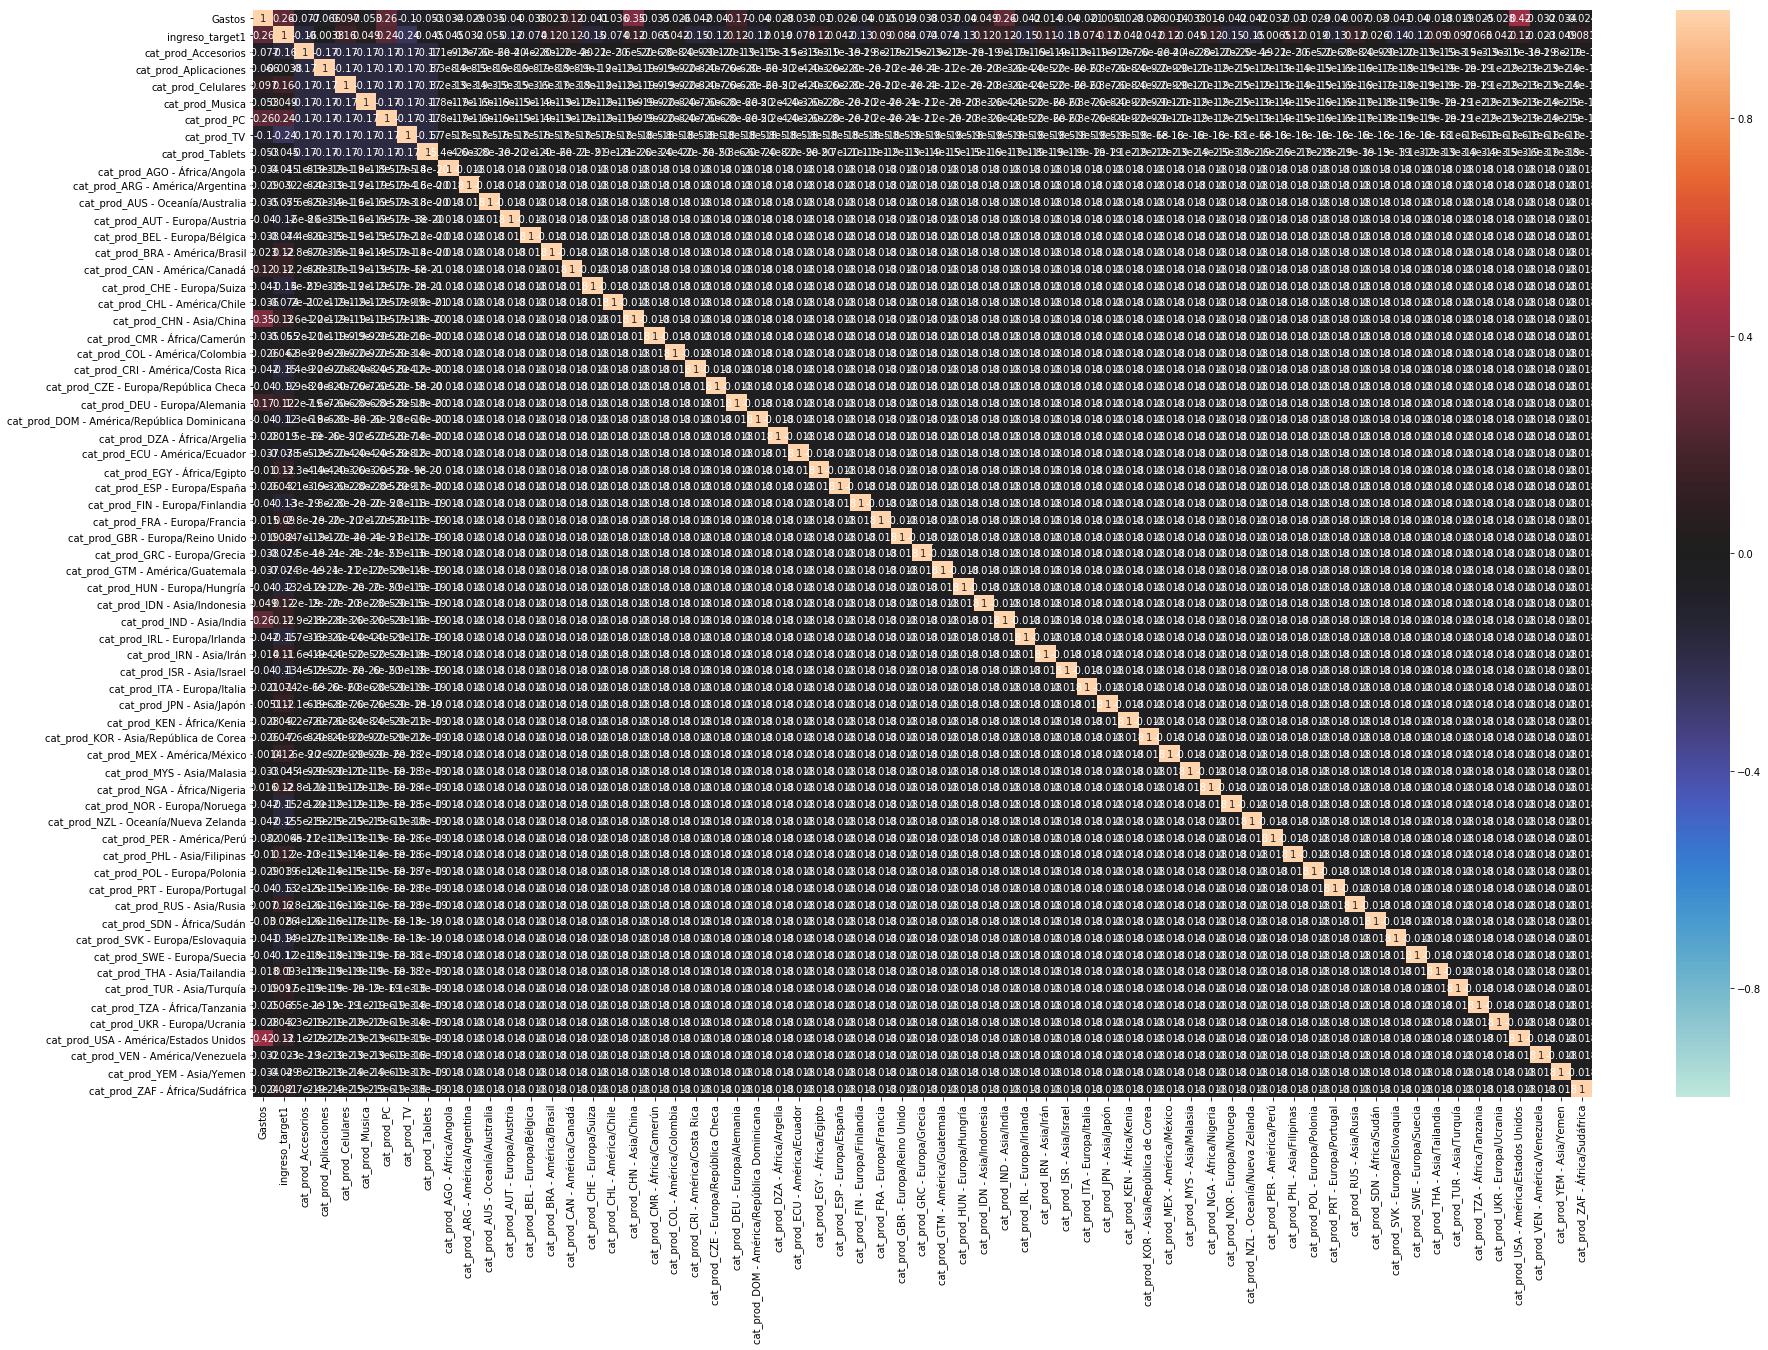

In [103]:
#Predefinimos las Dimensiones del Gráfico
plt.figure(figsize=(30,20))
#Graficamos un Mapa de Calor respecto a los Coeficientes de Correlación.
sns.heatmap(relaciones, annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = relaciones.columns, 
            yticklabels = relaciones.columns);



Entrenamiento y Predicción    xgb_model

In [2]:
from sklearn.model_selection import train_test_split 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot
import statsmodels.api as sm
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split 
from sklearn import datasets  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [1]:
!pip install xgboost

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [158]:
y = data['ingreso_target1']


In [171]:
columns = [col for col in data.columns if col not in ['ingreso_target1']]


In [172]:
x = data[columns]

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [177]:
def train(x_train,y_train):

    xgb_model = xgb.XGBClassifier()

    print("Comienza entrenamiento del modelo XGBoost")

    xgb_model.fit(x_train, y_train)

    print("Entrenamiento finalizado\n")
    print("Haciendo las predicciones\n\n")

    XGB_preds = xgb_model.predict(x_test)
    print(classification_report(y_test, XGB_preds))
    print(confusion_matrix(y_test, XGB_preds))
    return xgb_model

In [178]:
def predict(data_to_predict, xgb_model):
  
    print("\n\n-------------------------")
    print("Ingreso a la funcion de prediccion\n")

    XGB_preds = xgb_model.predict_proba(x)
    
    return XGB_preds

In [179]:
modelo = train(x_train, y_train)

Comienza entrenamiento del modelo XGBoost
Entrenamiento finalizado

Haciendo las predicciones




NameError: global name 'classification_report' is not defined